In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_1 = pd.read_csv('matches.csv')
data_2 = pd.read_csv('deliveries.csv')


# Analysing the dataset-1 (matches.csv)

In [2]:
data_1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
data_1.shape

(636, 18)

# Data cleaning

In [4]:
data_1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

#### We can drop 'umpire3' column as it has all Nan values

In [5]:
data_1.drop(columns='umpire3',inplace=True)

In [6]:
data_1.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

### See all rows which are having Nan values

In [7]:
def nans(df): return df[df.isnull().any(axis=1)]
nans(data_1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


In [8]:
nans(data_1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


### We can fill all cities having Nan values with 'Dubai' as their venue is 'Dubai International Cricket Stadium'

In [9]:
data_1.city.fillna('Dubai',inplace=True)

   #### Fill 'umpire2' and 'umpire2' Nan values with 'Anonymous'

In [10]:
data_1.umpire1.fillna('Anonymous',inplace=True)
data_1.umpire2.fillna('Anonymous',inplace=True)

In [11]:
data_1.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            0
umpire2            0
dtype: int64

In [12]:
nans(data_1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


#### We can see that there are no 'winners' and 'players of the matches' as 'result' has 'no result', it means match maybe abandoned due to rain
#### So, we will fill all Nan values with 'Match Abandoned' in this case..

In [13]:
data_1.winner.fillna('Match Abandoned',inplace=True)
data_1.player_of_match.fillna('Match Abandoned',inplace=True)

In [14]:
data_1.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [15]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             636 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           636 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  636 non-null    object
 14  venue            636 non-null    object
 15  umpire1          636 non-null    object
 16  umpire2          636 non-null    object
dtypes: int64(5), object(12)
memory usag

### Date is in object type, we change it to datetime format

In [16]:
data_1['date'] = pd.to_datetime(data_1['date'])

In [17]:
type(data_1['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
data_1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

####  We know that "Rising Pune Supergiants" and "Rising Pune Supergiant" are same, just 's' is missing in second one.
#### We will replace all "Rising Pune Supergiant" as "Rising Pune Supergiants"

In [19]:
data_1.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

In [20]:
data_1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

# Exploratory Data Analysis

### IPL Seasons

In [21]:
print('seasons:', data_1.season.unique())

seasons: [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016]


### Cities where IPL matches were held

In [22]:
print('Cities:', data_1.city.unique())

Cities: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai']


### Type of results

In [23]:
print(data_1.result.unique())

['normal' 'tie' 'no result']


In [24]:
#Number of Tie matches

print("No. of Tie matches: "+str(data_1[data_1.result=='tie'].id.count()))

No. of Tie matches: 7


In [25]:
#No result matches

print("No. of no result matches: "+str(data_1[data_1.result=='no result'].id.count()))

No. of no result matches: 3


### No of matches played in each season of IPL

In [26]:
#matches per season
data_1.groupby('season')['season'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
Name: season, dtype: int64

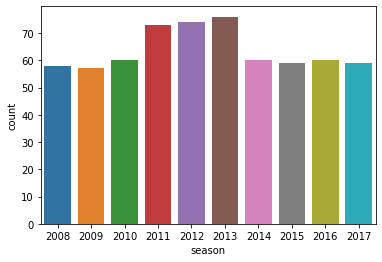

In [27]:
sns.countplot(x='season', data=data_1)
plt.show()

### Number of matches played in each venue

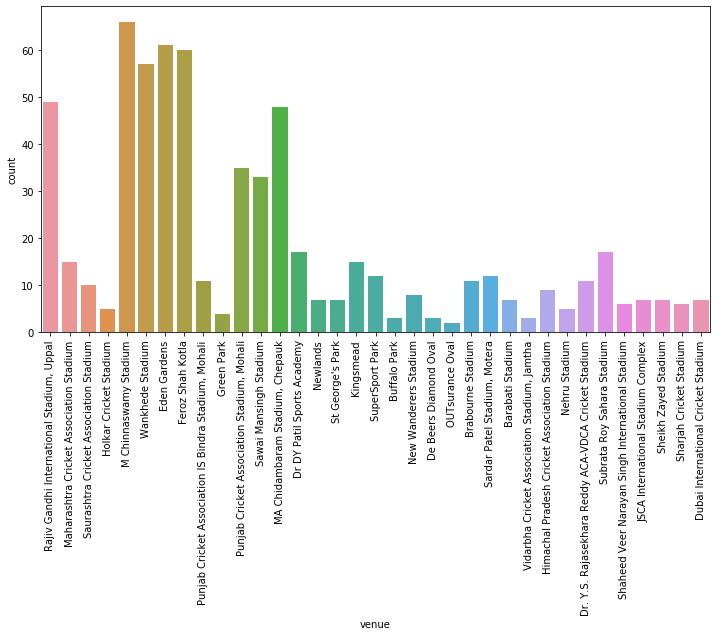

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=data_1)
plt.xticks(rotation='vertical')
plt.show()

### Number of matches played by each team

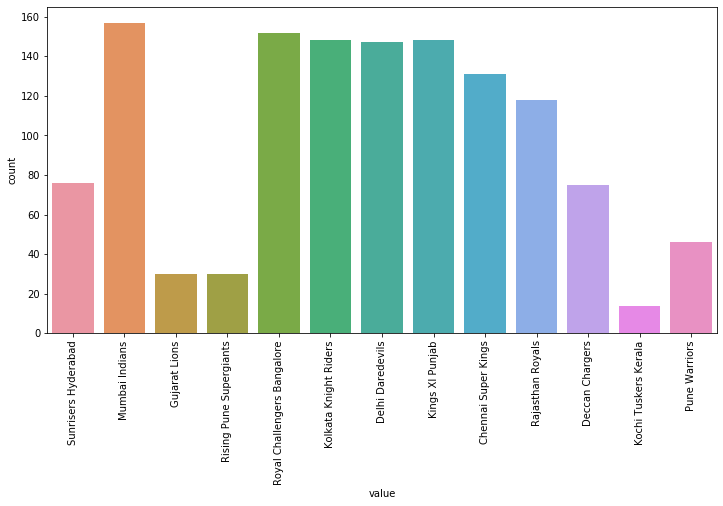

In [29]:
temp = pd.melt(data_1, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp)
plt.xticks(rotation='vertical')
plt.show()

### Toss decision

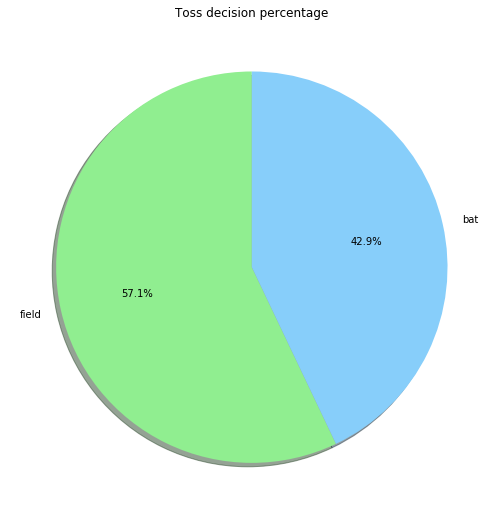

In [30]:
plt.subplots(figsize=(15,9))
toss = data_1.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
colors = ['lightgreen', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

### Results after winning the toss

In [31]:
#no of matches where toss winner is the match winner
print("No of matches where toss winner is match winner: "+str(data_1[(data_1.result == 'normal') & (data_1.toss_winner == data_1.winner)].id.count()))
print("No of matches where toss winner is not match winner: "+str(data_1[(data_1.result == 'normal') & (data_1.toss_winner != data_1.winner)].id.count()))

No of matches where toss winner is match winner: 322
No of matches where toss winner is not match winner: 304


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


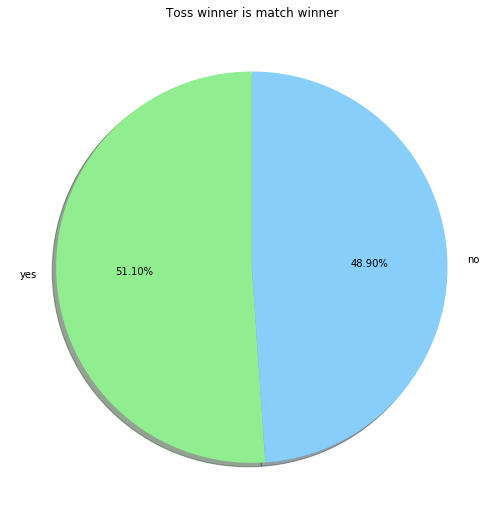

In [32]:
plt.subplots(figsize=(15,9))
data_1['toss_winner_is_winner'] = 'no'
data_1['toss_winner_is_winner'].loc[data_1.toss_winner == data_1.winner] = 'yes'
result = data_1.toss_winner_is_winner.value_counts()

labels = (np.array(result.index))
sizes = (np.array((result / result.sum())*100))
colors = ['lightgreen', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()

### Maximum toss winners

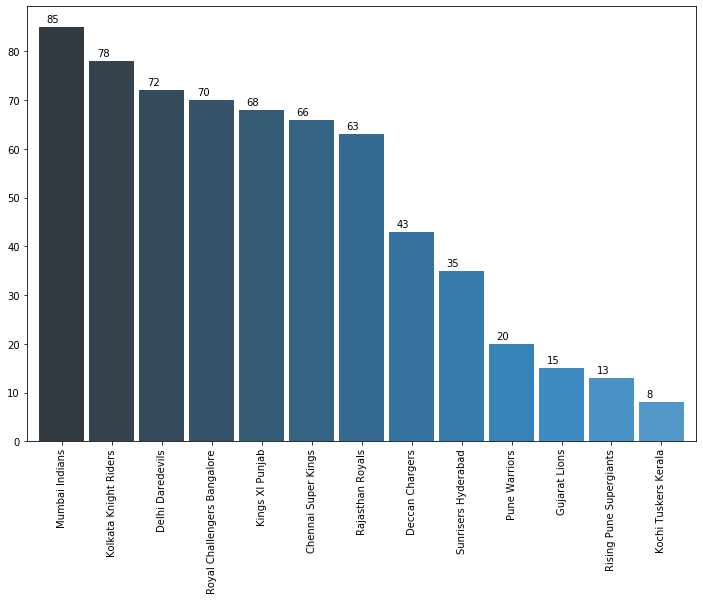

In [33]:
plt.subplots(figsize=(12,8))
ax=data_1['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('Blues_d',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

### Toss decision made in each season

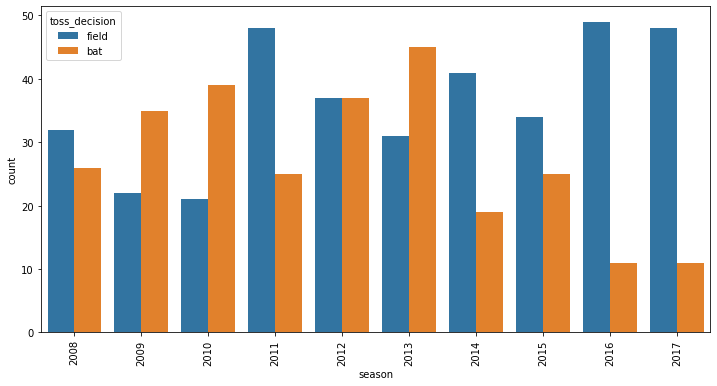

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=data_1)
plt.xticks(rotation='vertical')
plt.show()

### Number of wins by second batting teams(season-wise)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


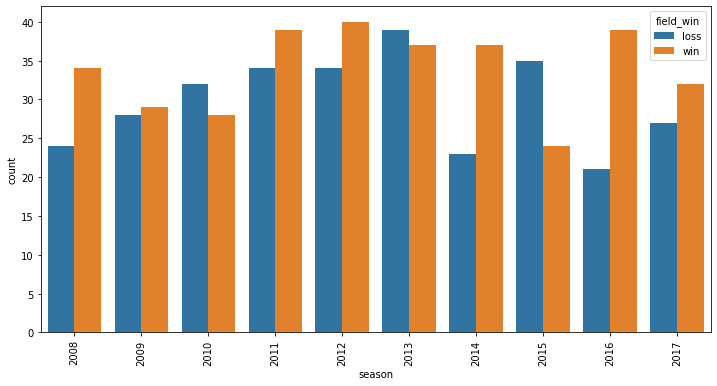

In [35]:
data_1["field_win"] = "win"
data_1["field_win"].loc[data_1['win_by_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=data_1)
plt.xticks(rotation='vertical')
plt.show()

## Percentage of match wins by team

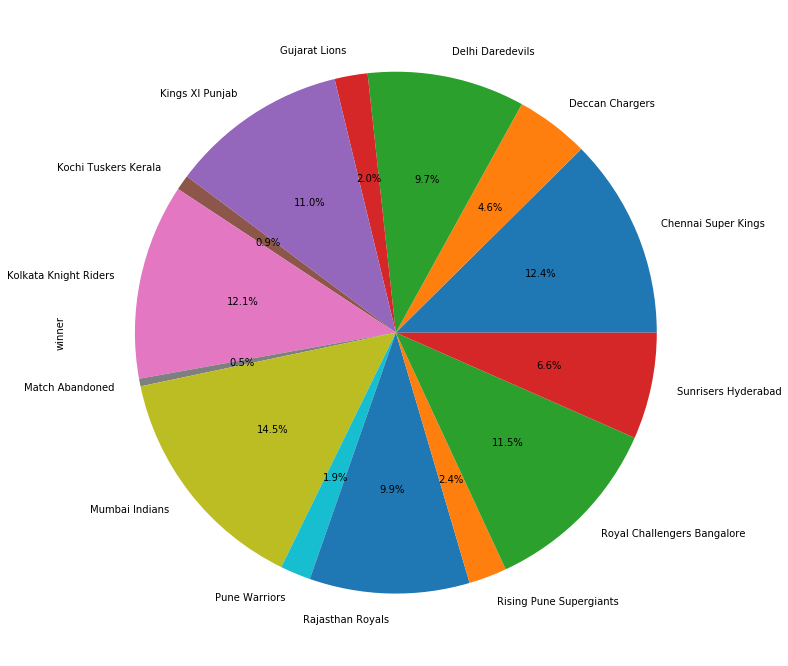

In [36]:
data_1.groupby("winner")['winner'].count().plot(figsize=(12,12),kind='pie',autopct='%1.1f%%',shadow=False)
#data_1.groupby("winner")['winner'].count().plot(figsize=(12,12),kind='pie',autopct='%1.1f%%',shadow=True)

### Number of matches won by each team

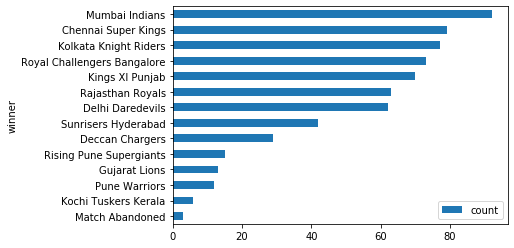

In [37]:
data_1.groupby('winner')['winner'].agg(['count']).sort_values('count').reset_index().plot(x='winner',y='count',kind='barh')

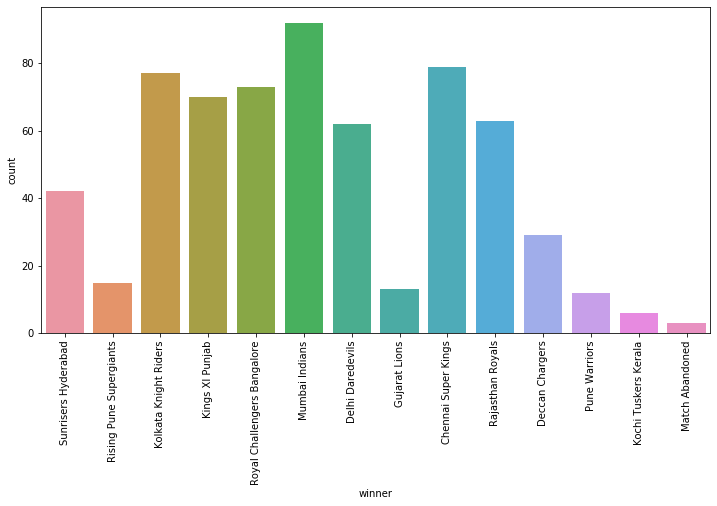

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=data_1)
plt.xticks(rotation='vertical')
plt.show()

### Top ten players who won man of the match most no. of times

In [39]:
df1 = pd.DataFrame({"count":data_1.groupby('player_of_match')['player_of_match'].count()}).reset_index()


In [40]:
df1

,player_of_match,count
0,A Chandila,1
1,A Kumble,3
2,A Mishra,9
3,A Nehra,6
4,A Singh,1
...,...,...
197,Washington Sundar,1
198,YK Pathan,16
199,YS Chahal,1
200,Yuvraj Singh,5


In [41]:
#sorting the values
df1 = df1.sort_values('count',ascending=False)

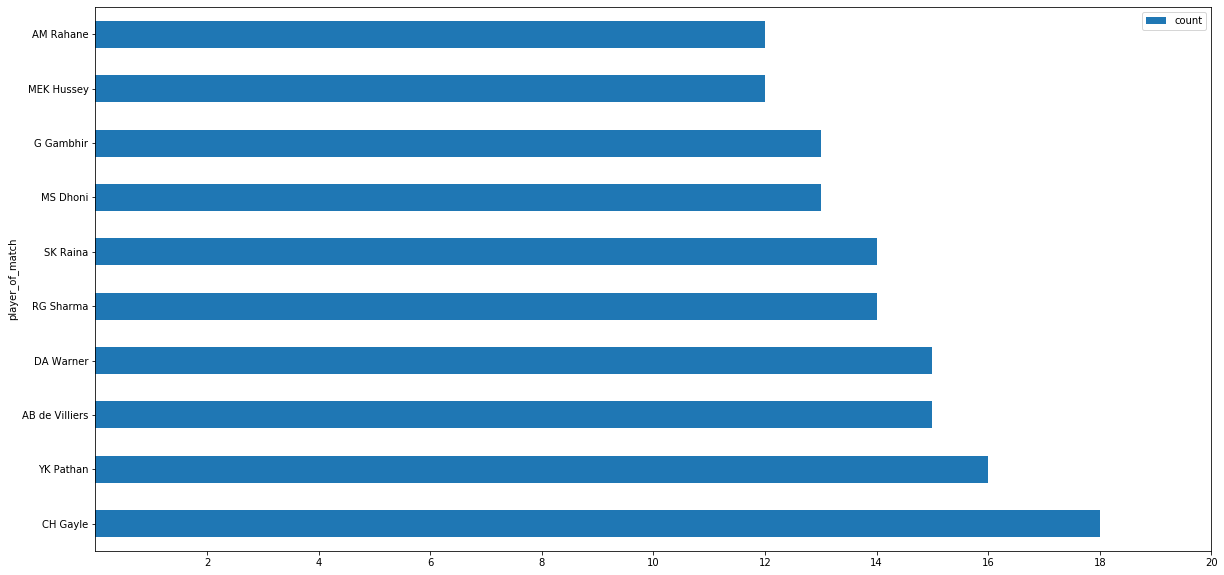

In [42]:
df1[0:10].plot.barh(figsize=(20,10),x='player_of_match',y='count',xticks=[2,4,6,8,10,12,14,16,18,20])

## overall performance of each team

In [43]:
matches_played_KKR=data_1[(data_1['team1']=='Kolkata Knight Riders') | (data_1['team2']=='Kolkata Knight Riders')]
matches_played_MI=data_1[(data_1['team1']=='Mumbai Indians') | (data_1['team2']=='Mumbai Indians')]
matches_played_KXP=data_1[(data_1['team1']=='Kings XI Punjab') | (data_1['team2']=='Kings XI Punjab')]
matches_played_CSK=data_1[(data_1['team1']=='Chennai Super Kings') | (data_1['team2']=='Chennai Super Kings')]
matches_played_DC=data_1[(data_1['team1']=='Deccan Chargers') | (data_1['team2']=='Deccan Chargers')]
matches_played_DD=data_1[(data_1['team1']=='Delhi Daredevils') | (data_1['team2']=='Delhi Daredevils')]
matches_played_RCB=data_1[(data_1['team1']=='Royal Challengers Bangalore') | (data_1['team2']=='Royal Challengers Bangalore')]
matches_played_KT=data_1[(data_1['team1']=='Kochi Tuskers Kerala') | (data_1['team2']=='Kochi Tuskers Kerala')]
matches_played_SH=data_1[(data_1['team1']=='Sunrisers Hyderabad') | (data_1['team2']=='Sunrisers Hyderabad')]
matches_played_RPS=data_1[(data_1['team1']=='Rising Pune Supergiants') | (data_1['team2']=='Rising Pune Supergiants')]
matches_played_RR=data_1[(data_1['team1']=='Rajasthan Royals') | (data_1['team2']=='Rajasthan Royals')]

A=matches_played_KKR['id'].count()
B=matches_played_MI['id'].count()
C=matches_played_KXP['id'].count()
D=matches_played_CSK['id'].count()
E=matches_played_DC['id'].count()
F=matches_played_DD['id'].count()
G=matches_played_RCB['id'].count()
H=matches_played_KT['id'].count()
I=matches_played_SH['id'].count()
J=matches_played_RPS['id'].count()
K=matches_played_RR['id'].count()


In [44]:
matches_won_KKR=data_1[data_1['winner']=='Kolkata Knight Riders']
matches_won_MI=data_1[data_1['winner']=='Mumbai Indians']
matches_won_KXP=data_1[data_1['winner']=='Kings XI Punjab']
matches_won_CSK=data_1[data_1['winner']=='Chennai Super Kings']
matches_won_DC=data_1[data_1['winner']=='Deccan Chargers']
matches_won_DD=data_1[data_1['winner']=='Delhi Daredevils']
matches_won_RCB=data_1[data_1['winner']=='Royal Challengers Bangalore']
matches_won_KT=data_1[data_1['winner']=='Kochi Tuskers Kerala']
matches_won_SH=data_1[data_1['winner']=='Sunrisers Hyderabad']
matches_won_RPS=data_1[data_1['winner']=='Rising Pune Supergiants']
matches_won_RR=data_1[data_1['winner']=='Rajasthan Royals']


O=matches_won_KKR['id'].count()
P=matches_won_MI['id'].count()
Q=matches_won_KXP['id'].count()
R=matches_won_CSK['id'].count()
S=matches_won_DC['id'].count()
T=matches_won_DD['id'].count()
U=matches_won_RCB['id'].count()
V=matches_won_KT['id'].count()
W=matches_won_SH['id'].count()
X=matches_won_RPS['id'].count()
Y=matches_won_RR['id'].count()



In [45]:
n_bins = 11
ind = np.arange(n_bins)
width = 0.50


matches_played=[A,B,C,D,E,F,G,H,I,J,K]
matches_won=[O,P,Q,R,S,T,U,V,W,X,Y]

#matches_played.sort()
#matches_won.sort()


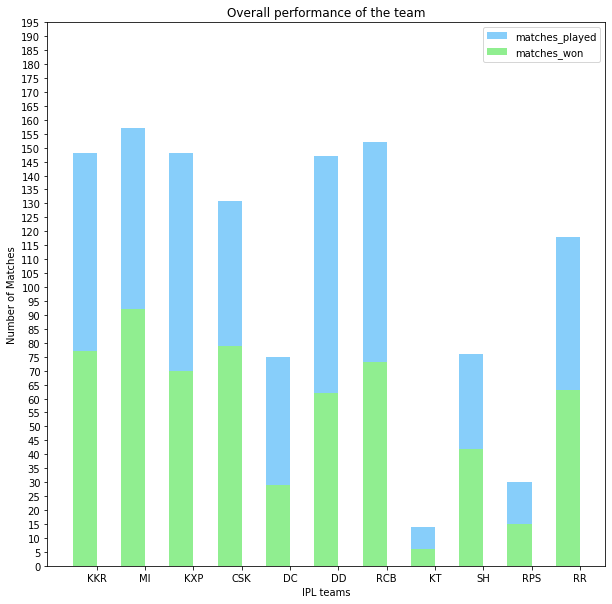

In [46]:
plt.figure(figsize=(10,10))

p1 = plt.bar(ind, matches_played, width, color='LightSkyBlue')
p2 = plt.bar(ind, matches_won, width, color='lightgreen')

plt.ylabel('Number of Matches')
plt.xlabel('IPL teams')
plt.title('Overall performance of the team')
plt.xticks(ind + width/2., ('KKR', 'MI', 'KXP', 'CSK', 'DC', 'DD', 'RCB', 'KT', 'SH', 'RPS', 'RR'))
plt.yticks(np.arange(0, 200, 5))
plt.legend((p1[0], p2[0]), ('matches_played', 'matches_won'))

###  Number of times each umpire appeared

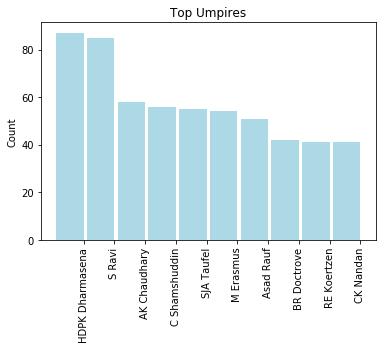

In [47]:
ump = pd.melt(data_1, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

ump = ump.value.value_counts()[:10]
labels = np.array(ump.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(ump), width=width, color='lightblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
plt.show()

# Analysis of Dataset-2 (deliveries.csv)

In [48]:
data_2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [49]:
data_2.shape

(150460, 21)

In [50]:
data_2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

#### 'player_dismissed' 'dismissal_kind' and 'fielder' have so many Nan values, it means the player was not out for that particular ball.
#### So we can neglect them.

## Dataframe with single players data

In [51]:
df_bats = data_2[data_2.batsman == 'MS Dhoni']
df_bats.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
469,2,2,Rising Pune Supergiant,Mumbai Indians,16,4,MS Dhoni,SPD Smith,HH Pandya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
473,2,2,Rising Pune Supergiant,Mumbai Indians,17,2,MS Dhoni,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
478,2,2,Rising Pune Supergiant,Mumbai Indians,18,1,MS Dhoni,SPD Smith,MJ McClenaghan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
479,2,2,Rising Pune Supergiant,Mumbai Indians,18,2,MS Dhoni,SPD Smith,MJ McClenaghan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
482,2,2,Rising Pune Supergiant,Mumbai Indians,18,5,MS Dhoni,SPD Smith,MJ McClenaghan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


### Graph of runs scored in each match by individual player

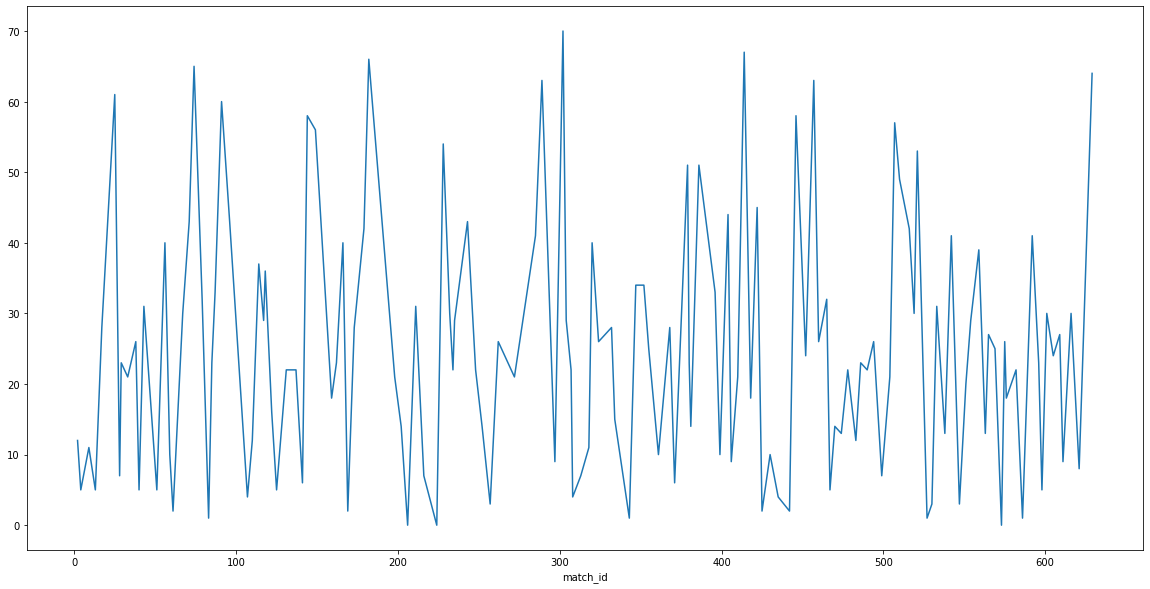

In [52]:
df_bats.groupby('match_id')['batsman_runs'].sum().plot(figsize=(20,10),kind = 'line')


### Comparison of different types of dismissals of a single batsman



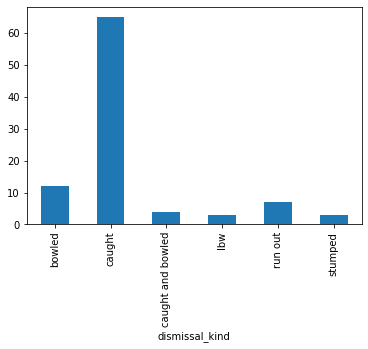

In [53]:
data_2[data_2.player_dismissed == 'MS Dhoni'].groupby('dismissal_kind')['dismissal_kind'].count().plot(kind='bar')

### How many times did each bowler acquire an individual batsman

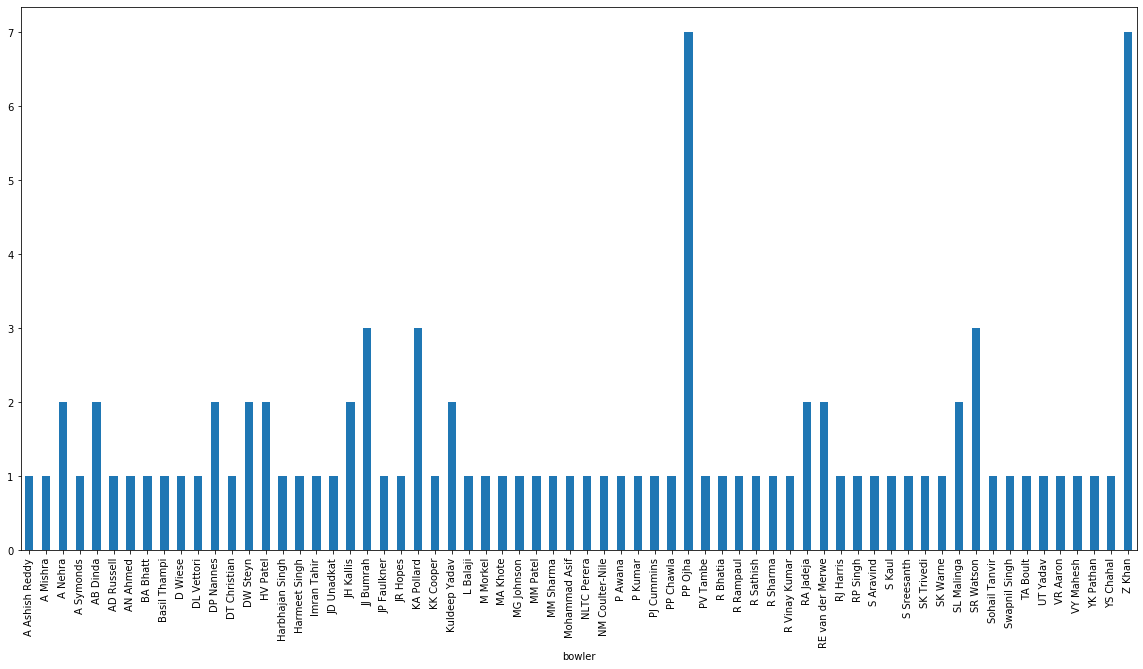

In [54]:
data_2[data_2.player_dismissed == 'MS Dhoni'].groupby('bowler')['bowler'].count().plot(figsize=(20,10),kind='bar')

### Top ten wickets takers



In [55]:
df1 = pd.DataFrame({'wickets':data_2[data_2.player_dismissed.notna()].groupby('bowler')['bowler'].count()}).reset_index()
df1= df1.sort_values('wickets',ascending=False)
print(df1[0:10])


              bowler  wickets
259       SL Malinga      170
5           A Mishra      142
80          DJ Bravo      137
107  Harbhajan Singh      136
204        PP Chawla      133
219    R Vinay Kumar      125
7            A Nehra      121
313           Z Khan      119
46           B Kumar      117
209         R Ashwin      110


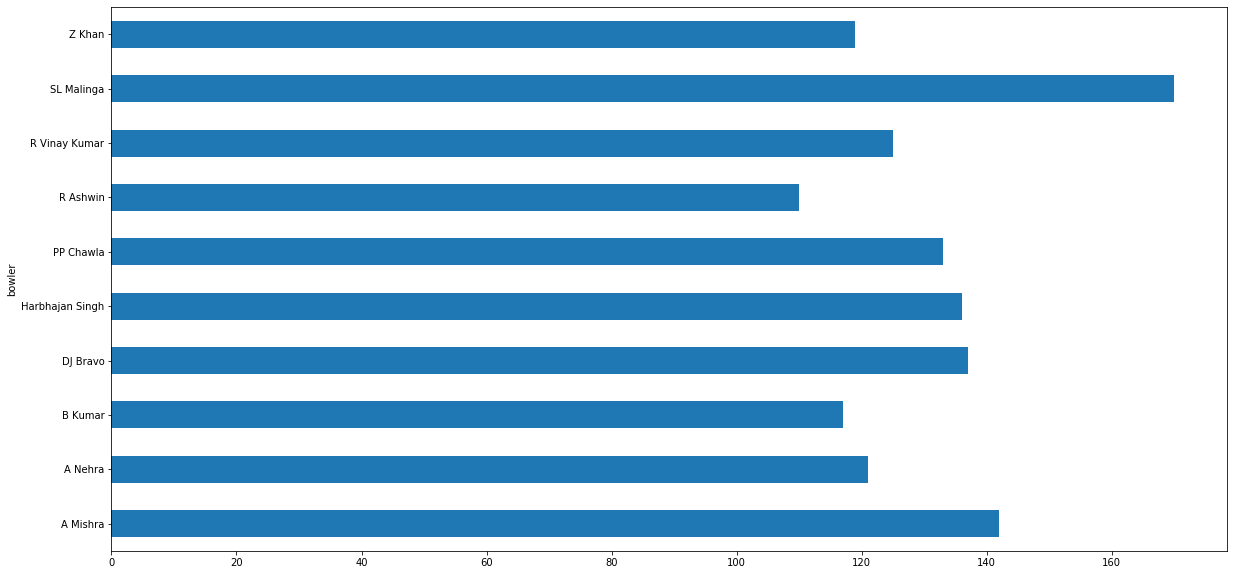

In [56]:
df1[0:10].groupby('bowler')['wickets'].sum().plot(kind='barh',figsize=(20,10))


### Comparison of different dismissal types by a individual bowler

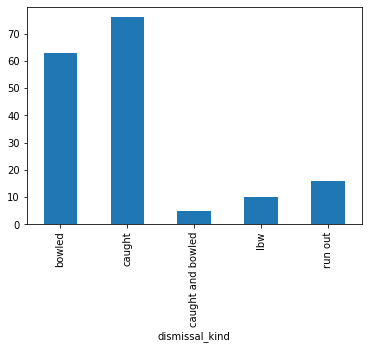

In [57]:
data_2[data_2.bowler == 'SL Malinga'].groupby('dismissal_kind')['dismissal_kind'].count().plot(kind='bar')

### Most runs by a batsman in IPL

In [58]:

maximum_runs = data_2.groupby(['batsman'])['batsman_runs'].sum()
maximum_runs
maximum_runs.sort_values(ascending = False,inplace=True)


Text(0, 0.5, 'Most Runs in IPL')

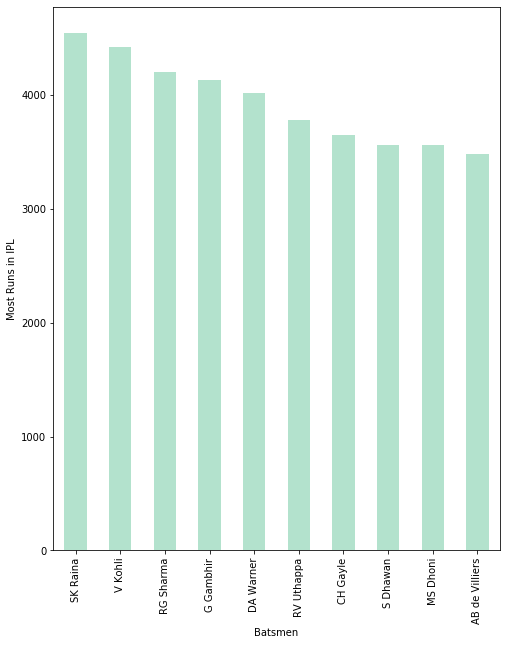

In [59]:
plt.figure(figsize=(8,10))
maximum_runs[:10].plot(x= 'bowler', y = 'runs', kind = 'bar', colormap = 'Pastel2')
plt.xlabel('Batsmen')
plt.ylabel('Most Runs in IPL')

### Most common dismissals in IPL

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

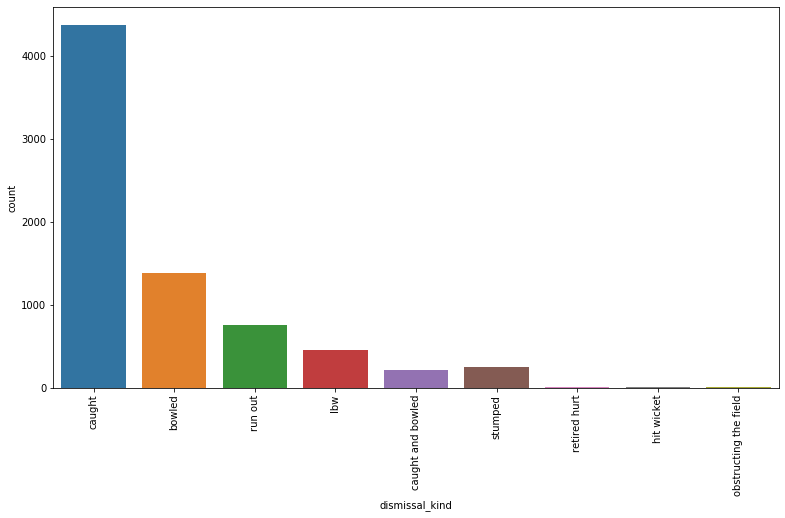

In [60]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data_2.dismissal_kind)
plt.xticks(rotation=90)


### Average Runs in Each Over

In [61]:
overs, number = np.unique(np.concatenate(data_2.groupby(['match_id','inning'])['over'].unique().values), return_counts=True)
average_runs_in_each_over = ((data_2.groupby(['over'])['total_runs'].sum())/(number)).round(2)

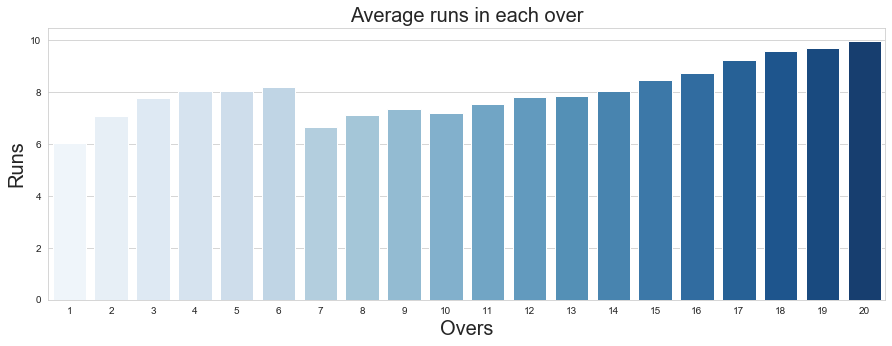

In [62]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
ax = sns.barplot(x=average_runs_in_each_over.index,y=average_runs_in_each_over.values,palette='Blues')
ax.set_xlabel("Overs").set_size(20)
ax.set_ylabel("Runs").set_size(20)
ax.set_title("Average runs in each over").set_size(20)